In [88]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [89]:
df = pd.read_csv("cleaned_data/02-cleaned.csv")

In [90]:
df

,datetime,tempmax,tempmin,temp,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,solarenergy,precipitation
0,2015-01-01,60.7,39.1,50.0,41.7,74.7,5.8,166.0,1020.4,79.1,8.3,0.8000
1,2015-01-02,71.0,49.9,54.9,48.4,80.1,9.2,26.0,1022.2,93.3,3.3,0.0000
2,2015-01-03,67.7,48.1,54.8,50.5,86.3,15.7,304.8,1021.0,90.3,5.0,0.5000
3,2015-01-04,69.9,48.1,54.5,49.6,85.5,9.2,252.4,1018.1,67.1,10.3,0.5000
4,2015-01-05,64.3,42.7,51.3,45.7,83.2,10.3,213.3,1013.9,41.6,12.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
3463,2025-06-26,84.1,71.5,76.7,71.6,85.9,11.4,220.1,1011.7,75.9,26.1,9.9000
3464,2025-06-27,82.3,69.7,76.7,71.1,84.0,12.8,237.0,1010.3,80.1,23.1,18.8000
3465,2025-06-28,82.3,71.5,76.1,70.5,84.3,11.4,278.3,1009.3,86.4,22.5,3.8000
3466,2025-06-29,82.3,71.5,73.5,71.4,94.2,16.1,223.2,1006.8,88.0,13.3,19.9898


In [91]:
df["datetime"] = pd.to_datetime(df["datetime"])


In [92]:
df.dtypes

datetime            datetime64[ns]
tempmax                    float64
tempmin                    float64
temp                       float64
dew                        float64
humidity                   float64
windspeed                  float64
winddir                    float64
sealevelpressure           float64
cloudcover                 float64
solarenergy                float64
precipitation              float64
dtype: object

In [93]:
def get_season(date):
    """
    Function to determine the season in Nepal based on the given date.
    Args:
        date (pd.Timestamp): A datetime object.
    Returns:
        str: The season corresponding to the date.
    """
    month = date.month
    day = date.day

    # Spring: Mid-March to Mid-May (blooming season, pre-monsoon)
    if (month == 3 and day >= 15) or (month == 4) or (month == 5 and day <= 15):
        return "Spring"  # 2 months 
    
    # Summer/Monsoon: 
    # - Early Summer (pre-monsoon heat): Mid-May to Mid-June
    # - Peak Monsoon: Mid-June to Mid-September
    elif (month == 5 and day > 15) or (month == 6 and day <= 15):
        return "Summer" # 1 month
    elif (month == 6 and day > 15) or (month == 7) or (month == 8) or (month == 9 and day <= 15):
        return "Monsoon" # 3 months
    
    # Autumn: Mid-September to Mid-November (post-monsoon, harvest season)
    elif (month == 9 and day > 15) or (month == 10) or (month == 11 and day <= 15):
        return "Autumn" # 2 months
    
    # Winter: Mid-November to Mid-March (cold, dry season)
    else: # ( month == 11 and day > 15 ) or ( month == 12 ) or ( month == 1 ) or ( month == 2 )or ( month == 3 and day <15 )
        return "Winter" # 4 months

In [94]:
df["month"] = df["datetime"].dt.month
df['season'] = df['datetime'].apply(get_season)


In [95]:
# dummies = pd.get_dummies(df['season'])

# # Concatenate the dummies with the original dataframe
# df = pd.concat([df, dummies], axis=1)

In [96]:
# spans = [3,7]
# for span in spans:
#     df[f'EMA_span_{span}'] = df['precipitation'].ewm(span=span, adjust=False).mean()

# df[['precipitation'] + [f'EMA_span_{span}' for span in spans]].plot()

# plt.title('EMA with Different Span Values')
# plt.figure(figsize=(50,25))

# plt.show()

# #deleting
# for span in spans:
#     df = df.drop(columns=[f"EMA_span_{span}"])

In [97]:
#rolling averages introduce lag, particularly when using simple movingaverages (SMA) with fixed window sizes
# so we use  exponential moving averages (EMA), which assign higher weights to more recent observations

#A smaller span gives more weight to recent observations, making the EMA more responsive to changes but also more volatile.
#A larger span smooths out fluctuations, giving equal importance to a broader range of past observations.

# span = 3
# df["temp_EMA_3_days"] = df['temp'].ewm(span=span, adjust=False).mean()


### Constructing Lagged Variables for Temperature and Humidity

In [98]:

# df['humidity_lag_2_days'] = df['humidity'].shift(2)
# df['precipitation_lag_2_days']=df['precipitation'].shift(2)
# df['precipitation_lag_1_days']=df['precipitation'].shift(1)
# df['precipitation_lag_2_days'] = df['precipitation'].shift(2)  # Two days ago's precipitation

# Temporal rolling statistics (exclude current day)
# df['precip_rolling_mean_3_days'] = df['precipitation'].rolling(window=3).mean().shift(1)  # Mean of past 3 days
# df['precip_rolling_sum_7_days'] = df['precipitation'].rolling(window=7).sum().shift(1)    # Sum of past 7 days
# df['precip_rate_of_change'] = df['precipitation'].diff().shift(1)                        # Rate of change (previous day)

# Cumulative precipitation (up to the previous day)
# df['cumulative_precipitation'] = df['precipitation'].cumsum().shift(1)

# df = df.drop(columns=['precipitation_lag_2_days'])

In [99]:
# # Dry/wet spell lengths (based on lagged precipitation)
# df['dry_spell_length'] = (df['precipitation_lag_1_days'] == 0).astype(int).groupby((df['precipitation_lag_1_days'] != 0).cumsum()).cumsum()
# df['wet_spell_length'] = (df['precipitation_lag_1_days'] > 0).astype(int).groupby((df['precipitation_lag_1_days'] == 0).cumsum()).cumsum()


In [100]:
df.dtypes

datetime            datetime64[ns]
tempmax                    float64
tempmin                    float64
temp                       float64
dew                        float64
humidity                   float64
windspeed                  float64
winddir                    float64
sealevelpressure           float64
cloudcover                 float64
solarenergy                float64
precipitation              float64
month                        int32
season                      object
dtype: object

In [101]:
df.isna().sum()

datetime            0
tempmax             0
tempmin             0
temp                0
dew                 0
humidity            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
solarenergy         0
precipitation       0
month               0
season              0
dtype: int64

In [102]:
df.dropna(inplace=True)
len(df)

3468

In [103]:
# # adjusting the null values in the newly created features

# df.humidity_lag_2_days = df.humidity_lag_2_days.fillna(df.humidity_lag_2_days.iloc[2:10].mean()) #applying 1 week avg
# df.precipitation_lag_2_days = df.precipitation_lag_2_days.fillna(df.precipitation_lag_2_days.iloc[2:10].mean())
# df.precipitation_lag_1_days =  df.precipitation_lag_1_days.fillna(df.precipitation_lag_1_days.iloc[1:8].mean())

In [104]:
#  approach captures the cyclical nature of months while reducing dimensionality compared to one-hot encoding 
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

In [105]:
df.head()

,datetime,tempmax,tempmin,temp,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,solarenergy,precipitation,month,season,month_sin,month_cos
0,2015-01-01,60.7,39.1,50.0,41.7,74.7,5.8,166.0,1020.4,79.1,8.3,0.8,1,Winter,0.5,0.866025
1,2015-01-02,71.0,49.9,54.9,48.4,80.1,9.2,26.0,1022.2,93.3,3.3,0.0,1,Winter,0.5,0.866025
2,2015-01-03,67.7,48.1,54.8,50.5,86.3,15.7,304.8,1021.0,90.3,5.0,0.5,1,Winter,0.5,0.866025
3,2015-01-04,69.9,48.1,54.5,49.6,85.5,9.2,252.4,1018.1,67.1,10.3,0.5,1,Winter,0.5,0.866025
4,2015-01-05,64.3,42.7,51.3,45.7,83.2,10.3,213.3,1013.9,41.6,12.0,0.0,1,Winter,0.5,0.866025


In [106]:
seasons_dict = {'Spring': 1, 
                'Summer': 2, 
                'Monsoon': 3, 
                'Autumn': 4, 
                'Winter': 5
                }

In [107]:
# mapping seasons to it's numbers by creating a new column
df["season_number"] = df["season"].map(seasons_dict)

In [108]:
total_seasons = len(seasons_dict.items())
total_seasons

5

In [109]:
# implementing cyclic encoding on the season

df["season_sin"] = np.sin(2 * np.pi * df['season_number'] / total_seasons)
df["season_cos"] = np.cos(2 * np.pi * df['season_number'] / total_seasons)

In [110]:
# df.to_csv("test.csv",index=False)

In [111]:
# Integrates temperature and humidity to measure perceived heat.
# Provides actionable insights for extreme weather conditions.
# df["heat index"] = df.temp - ((100 - df.humidity)/5)

# df["wind chill"] = df.temp * df.windspeed


In [112]:
# Vapor Pressure Deficit (VPD)
# Derived from temperature and humidity, crucial for predicting drought stress and fire risks.
# VPD significantly influences vegetation productivity and wildfire risks.

# def VPD(row):
#     # Calculate saturation vapor pressure (e_s)
#     e_s = 6.1708 * np.exp((17.2 * row["temp"]) / (row["temp"] + 237.3))
    
#     # Calculate actual vapor pressure (e_a)
#     e_a = round(row["temp"] * row["humidity"] / 100, 1)
    
#     # Return the vapor pressure deficit (VPD)
#     return e_s - e_a

# df["Vapor Pressure Deficit"] = df.apply(VPD, axis=1)


In [113]:
# Helps understand atmospheric aridity and its impact on precipitation.
# df["dew_point_depression"]=df.temp - df.dew 

In [114]:
# Seasonal Wind Direction Patterns

# Encodes wind direction with sine/cosine transformations to capture seasonal variations.
# Enhances the ability to model cyclical trends in precipitation data.

df['winddir_sin'] = np.sin(np.radians(df['winddir']))
df['winddir_cos'] = np.cos(np.radians(df['winddir']))

# Combining these with seasonal encodings (season_sin, season_cos)
# df['combined_seasonal_wind_pattern'] = np.sqrt(
#     df['winddir_sin']**2 + df['winddir_cos']**2 + df['season_sin']**2 + df['season_cos']**2
# )

In [115]:
# Temperature-Humidity Interaction (Cross-Lagged)
# Cross-lagged interactions between temperature and humidity changes over time.
#  Capturing lagged effects improves understanding of complex environmental interactions.
# df['temp_humidity_interaction'] = (
#     (df['temp'] - df['temp_EMA_3_days']) *
#     (df['humidity'] - df['humidity_lag_2_days'])
# )

In [116]:
# Wind-driven moisture flux:
# df['moisture_flux'] = df['windspeed'] * np.sin(np.radians(df['winddir'])) * df['humidity']


#### Rainfall-related features tailored to Kathmandu's geography

In [117]:
# """ Orographic Precipitation Potential
# #Estimates the likelihood of orographic rainfall caused by moist air rising over hills.
# #Hills surrounding Kathmandu force moist air to rise, cool, and condense, leading to enhanced rainfall on windward slopes and rain shadows on leeward slopes.
# """
df['orographic_precipitation_potential'] = df['windspeed'] * np.sin(np.radians(df['winddir'])) * df['humidity']

#Positive values indicate windward slopes (enhanced rainfall).
#Negative values indicate leeward slopes (rain shadow).

In [118]:
# """
# Valley Temperature Inversion Index
# #Captures temperature inversion events where cooler air gets trapped in the valley.
# # Temperature inversions are common in valleys like Kathmandu, especially during winter nights, and can suppress rainfall.
# """
# # Placeholder for elevation difference (e.g., 500 meters)
delta_z = 500
# # df['temperature_inversion_index'] = (df['temp'] - df['dew']) / delta_z
# # df=df.drop(columns=['temperature_inversion_index'])
# # Valley-specific temperature inversion index
df['valley_temperature_inversion_index'] = (
    df['temp'] - df['dew']
) / delta_z

In [119]:
# """
# Wind Channeling Effect
# #  Measures how wind speed and direction interact with the valley's topography.
# #  Winds are often channeled through valleys, affecting local precipitation patterns.
# """
# df['wind_channeling_effect'] = df['windspeed'] * np.cos(np.radians(df['winddir']))

In [120]:
# """
# Rain Shadow Effect
# # Quantifies the reduction in precipitation due to rain shadowing on the leeward side of hills.
# # Kathmandu lies in a rain shadow during certain wind directions, reducing rainfall.
# """
# #Negative sine values indicate leeward slopes.
# df['wind_shadow_effect'] = np.maximum(0, -np.sin(np.radians(df['winddir']))) * df['windspeed']

In [121]:
# # """
# #  Urban Heat Island Effect on Rainfall
# # Description : Captures how urbanization in Kathmandu modifies local rainfall patterns.
# # Justification : Urban heat islands can enhance convection and localized rainfall.
# # """
df['urban_heat_island_effect_refined'] = (
    df['temp'] - df['dew'] + df['sealevelpressure'] / 1000 - df['cloudcover'] / 100
)

In [122]:
# """ 
# Convective Rainfall Potential
# Description : Estimates the potential for convective rainfall driven by localized heating in the valley.
# Justification : Convective storms are common in Kathmandu during pre-monsoon and monsoon seasons.
# """
# df['convective_rainfall_potential'] = ((df['temp'] - df['dew']) * df['windspeed']) / df['humidity']

In [123]:
# #Moisture convergence measures how humidity and wind interact to concentrate moisture.

# df['moisture_convergence'] = df['humidity'] * df['windspeed'] * np.cos(np.radians(df['winddir']))

In [124]:
# # Cloud cover-temperature interaction
# df['cloud_cover_temp_interaction'] = df['cloudcover'] * df['temp']

# # Cloud cover-humidity interaction
# df['cloud_cover_humidity_interaction'] = df['cloudcover'] * df['humidity']

In [125]:
# Extreme Weather Indicators
# Heavy rainfall indicator
# df['heavy_rainfall_indicator'] = (df['precipitation'] > 50).astype(int) # droppppped

# High wind speed indicator
# df['high_windspeed_indicator'] = (df['windspeed'] > 10).astype(int)

In [126]:
df.to_csv("test.csv",index=False)

In [127]:

len(df.dtypes)


24

In [128]:
df.isna().sum()

datetime                              0
tempmax                               0
tempmin                               0
temp                                  0
dew                                   0
humidity                              0
windspeed                             0
winddir                               0
sealevelpressure                      0
cloudcover                            0
solarenergy                           0
precipitation                         0
month                                 0
season                                0
month_sin                             0
month_cos                             0
season_number                         0
season_sin                            0
season_cos                            0
winddir_sin                           0
winddir_cos                           0
orographic_precipitation_potential    0
valley_temperature_inversion_index    0
urban_heat_island_effect_refined      0
dtype: int64

In [129]:
df.duplicated().sum()

0

In [130]:
df.to_csv("cleaned_data/03-interaction_features.csv",index=False)

# now visualizing and interpreting the relations between target and other features

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [55]:
#chnge the path to -> /home/momo/Downloads/dataset for prec/cleaned_data/03-interaction_features.csv
df  = pd.read_csv("/home/momo/Downloads/dataset for prec/cleaned_data/03-interaction_features.csv")

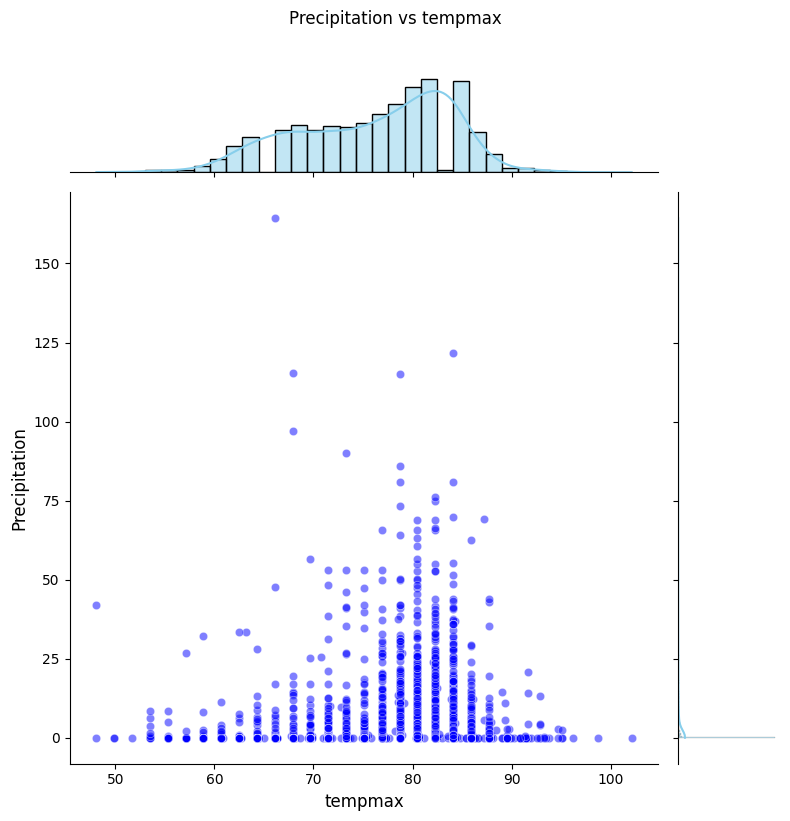

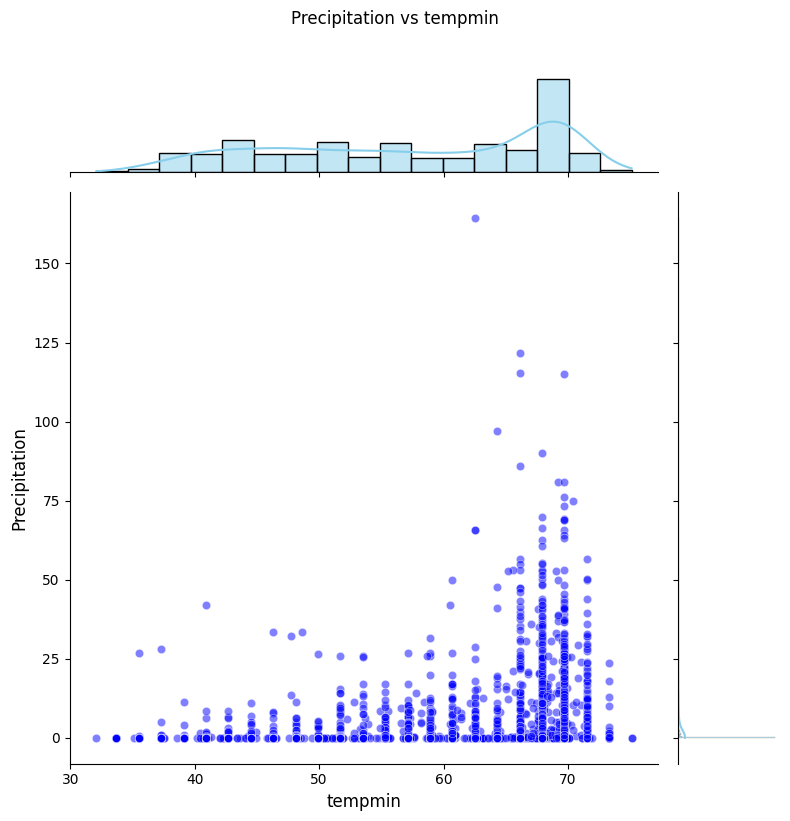

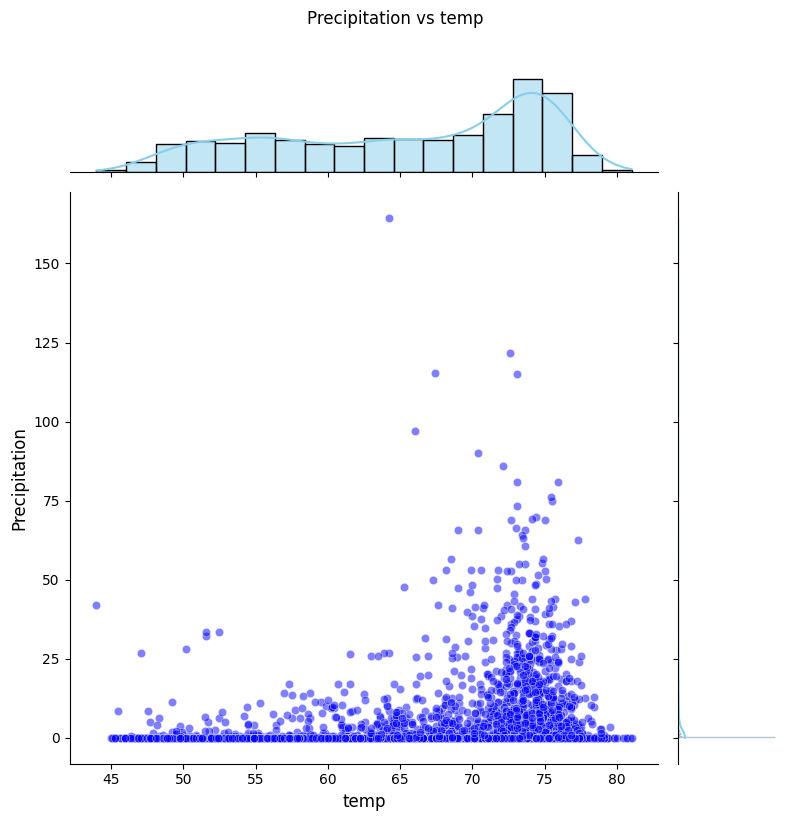

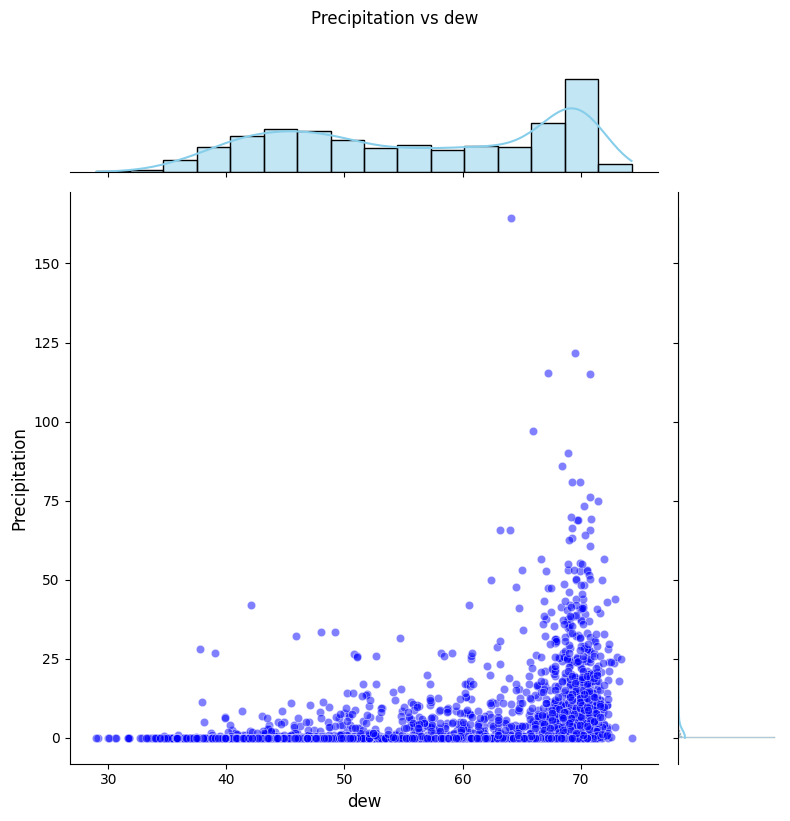

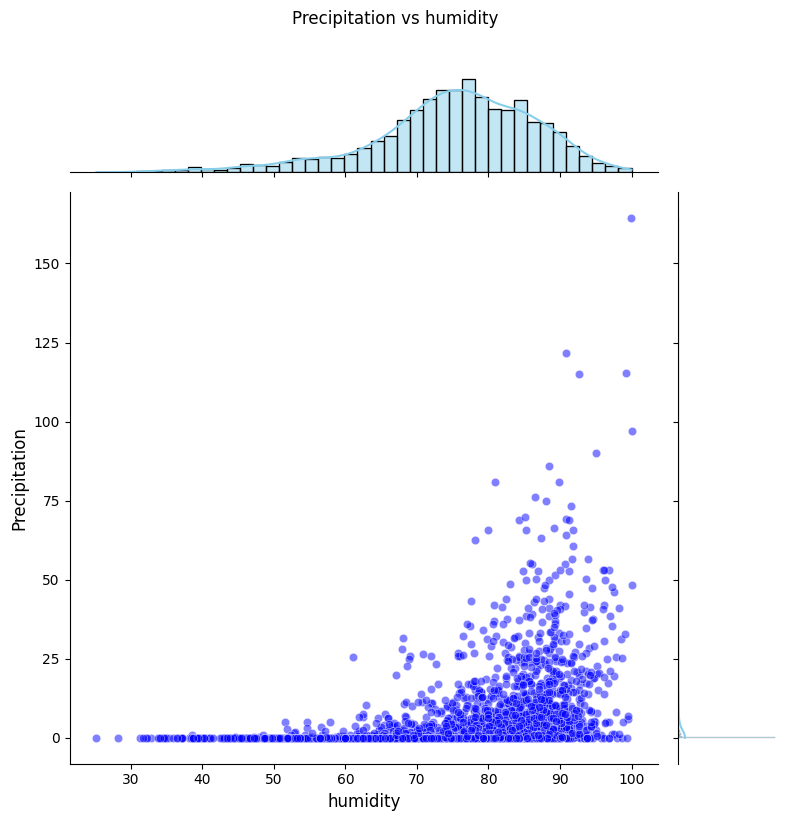

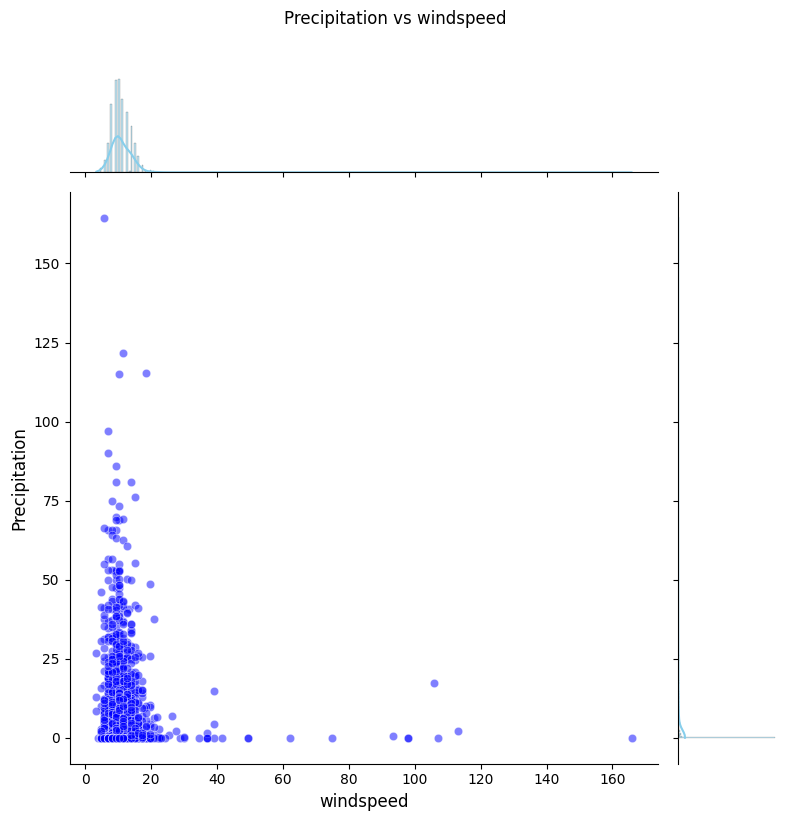

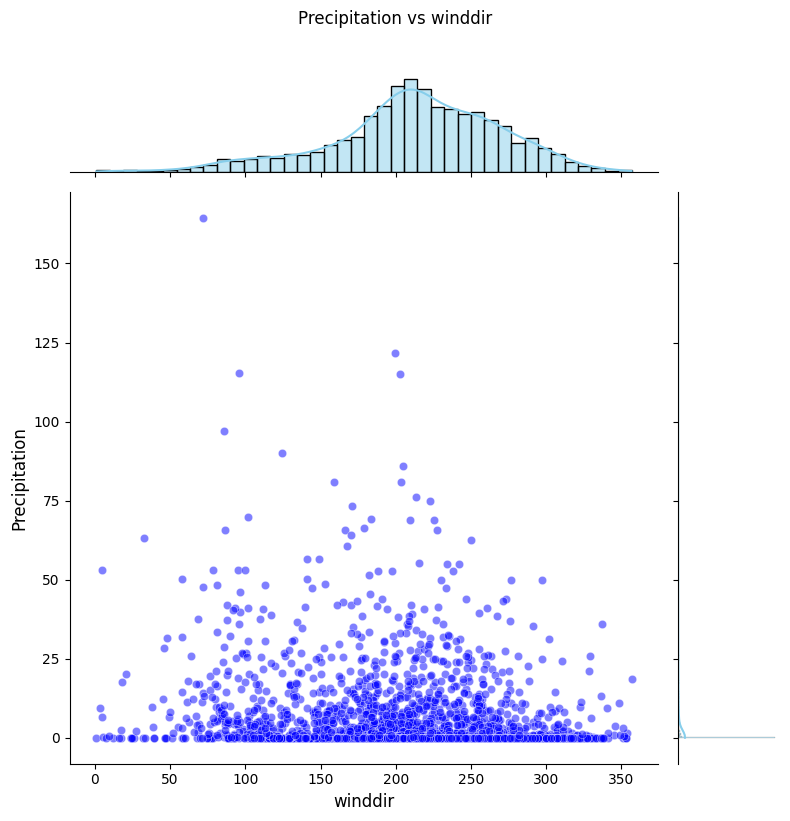

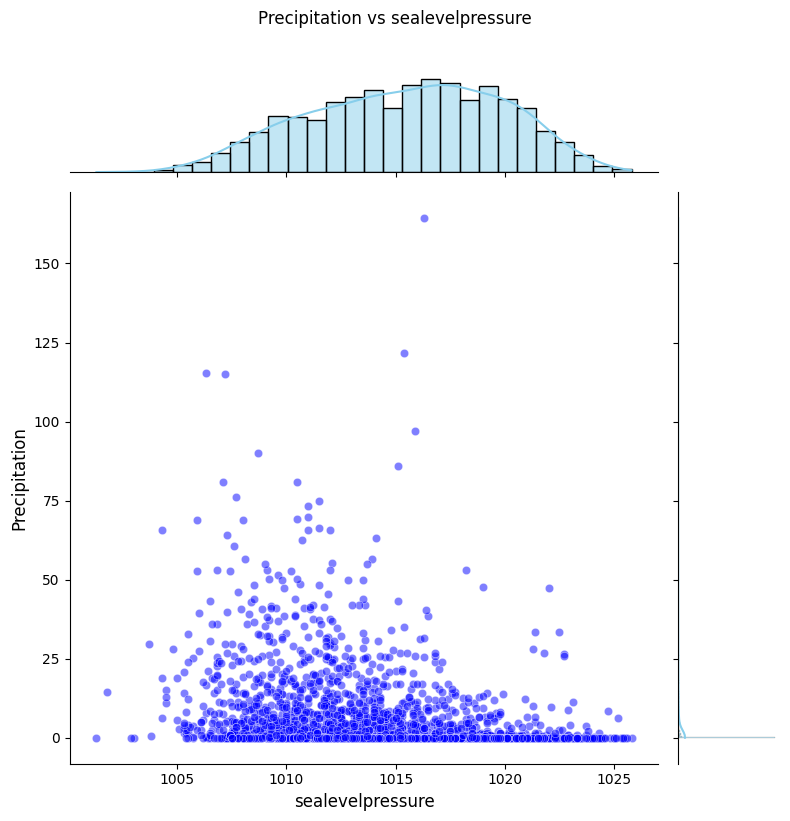

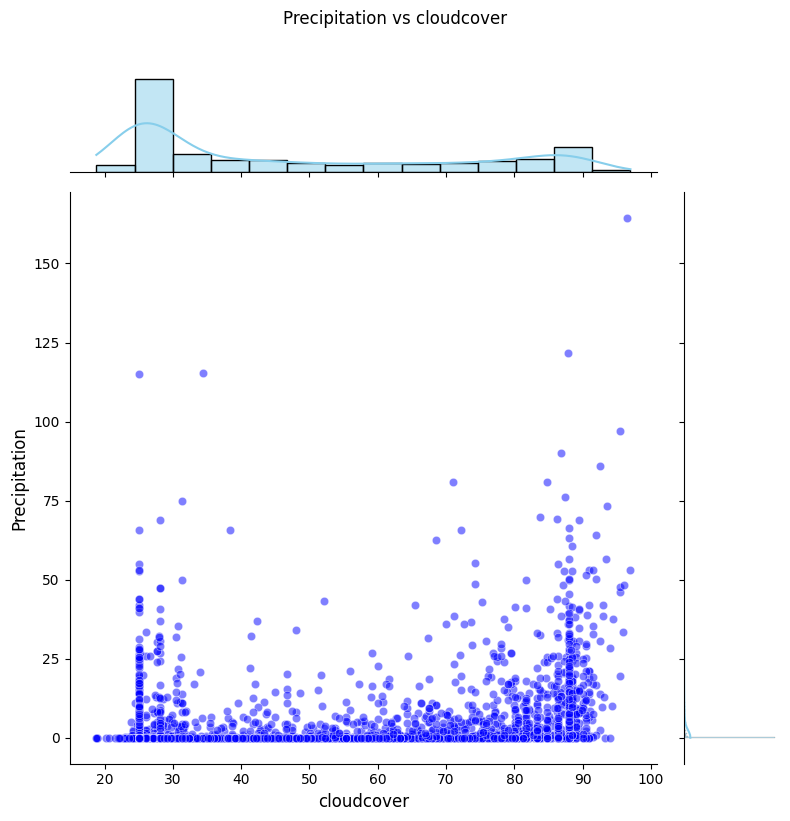

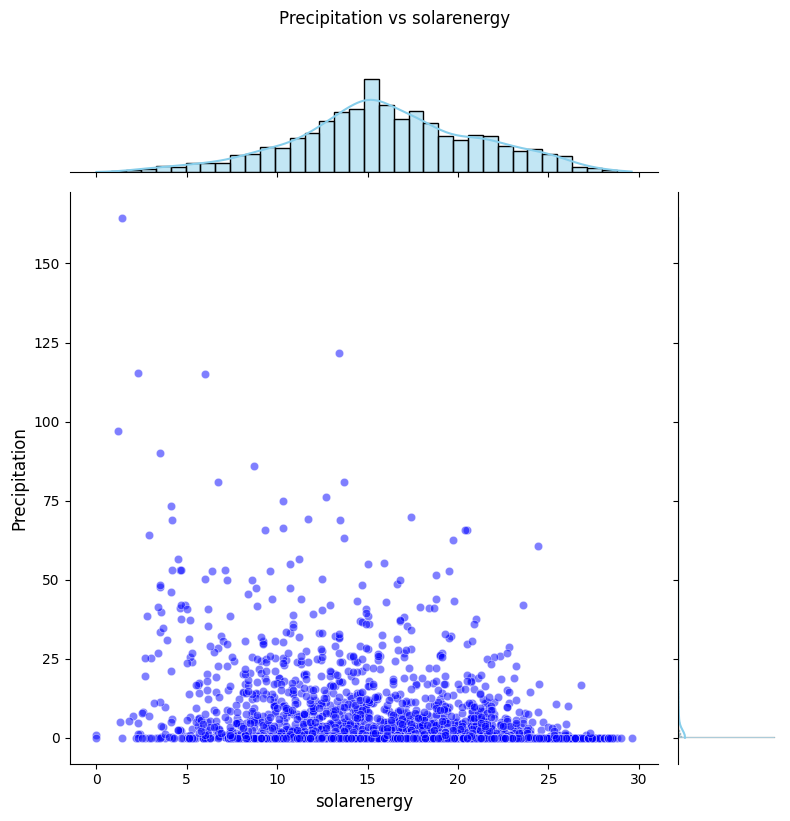

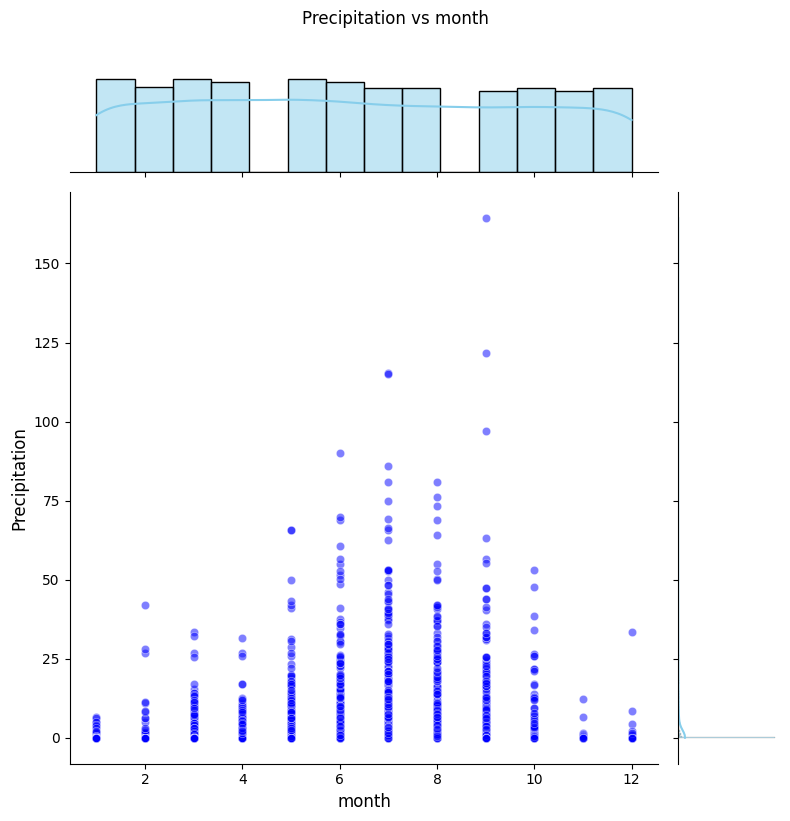

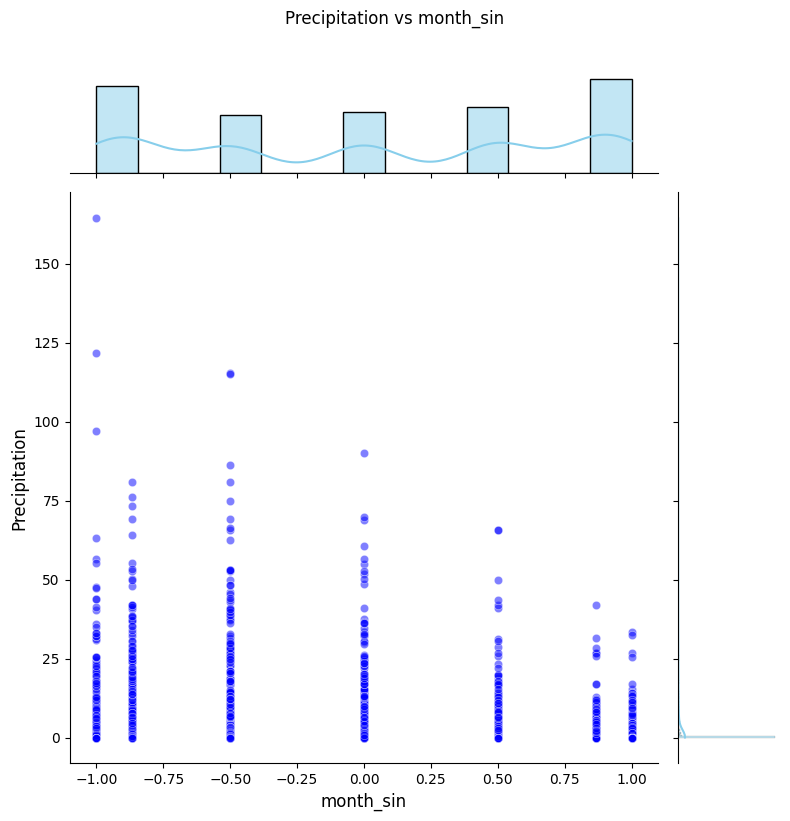

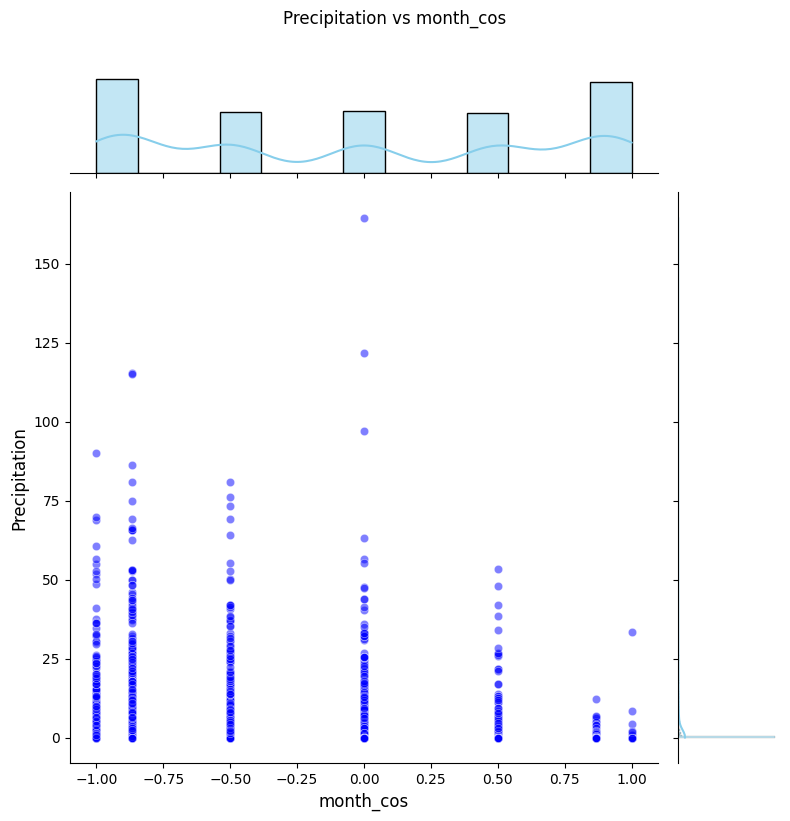

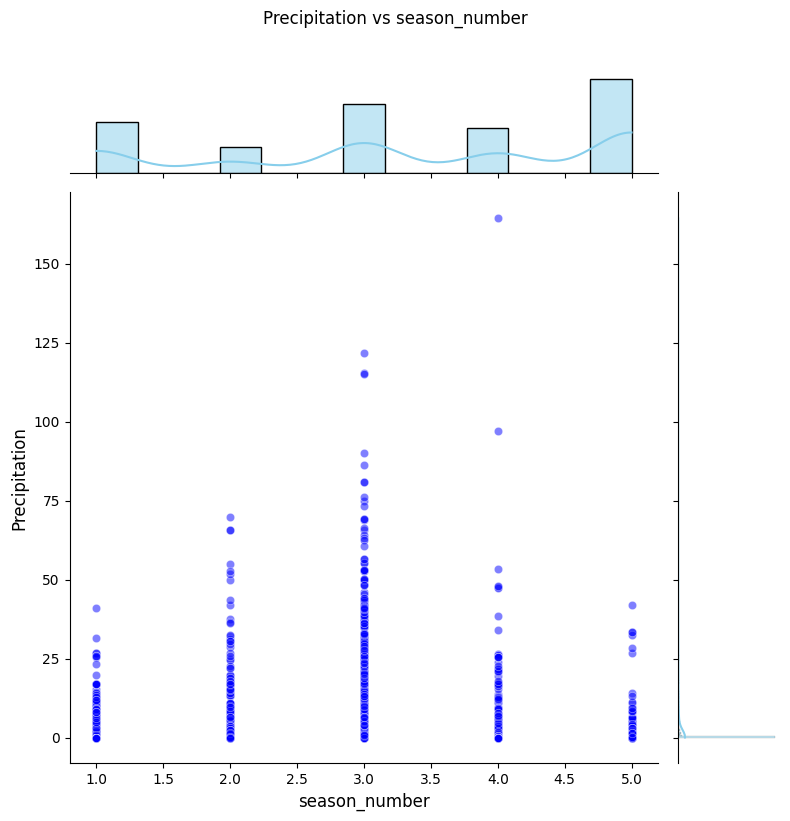

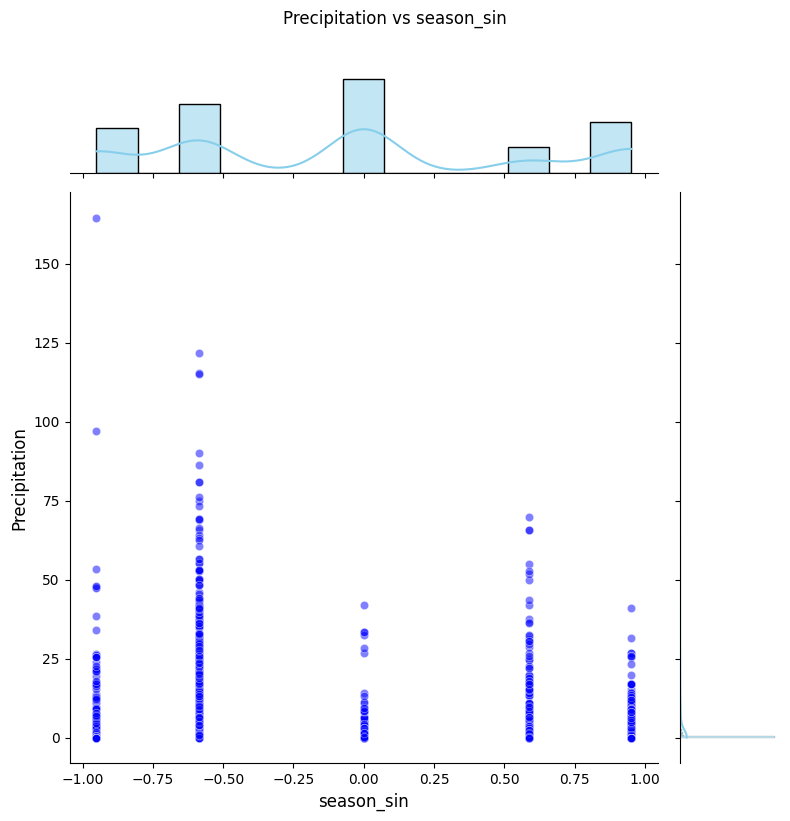

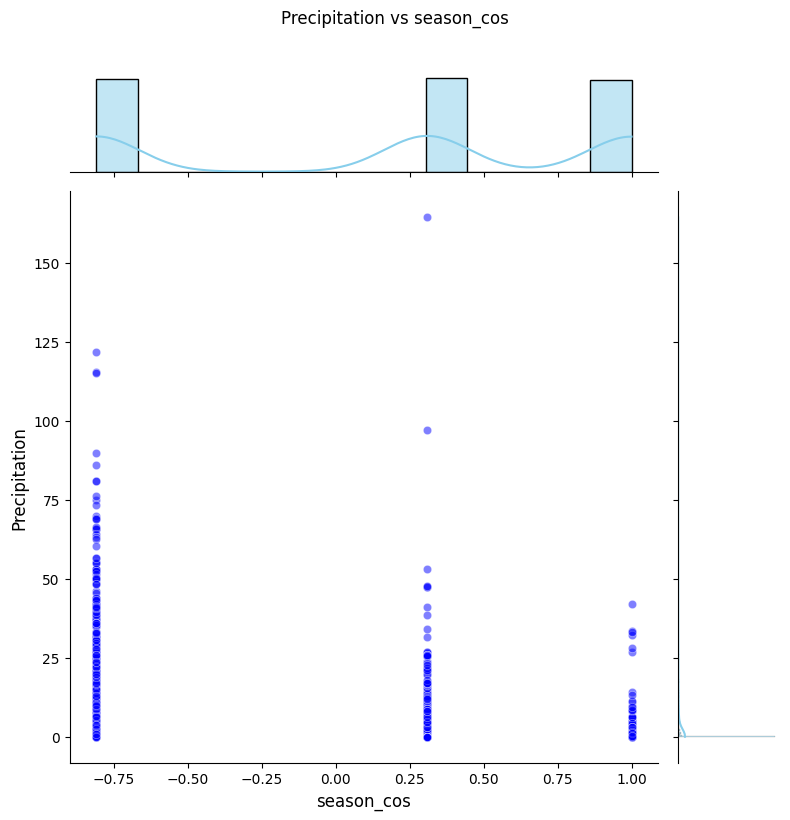

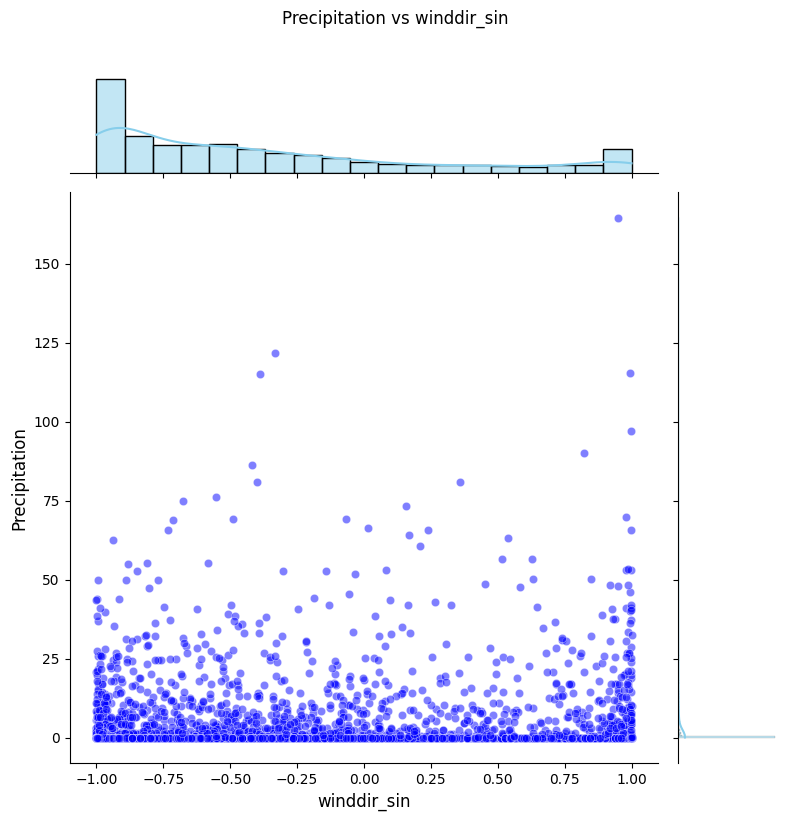

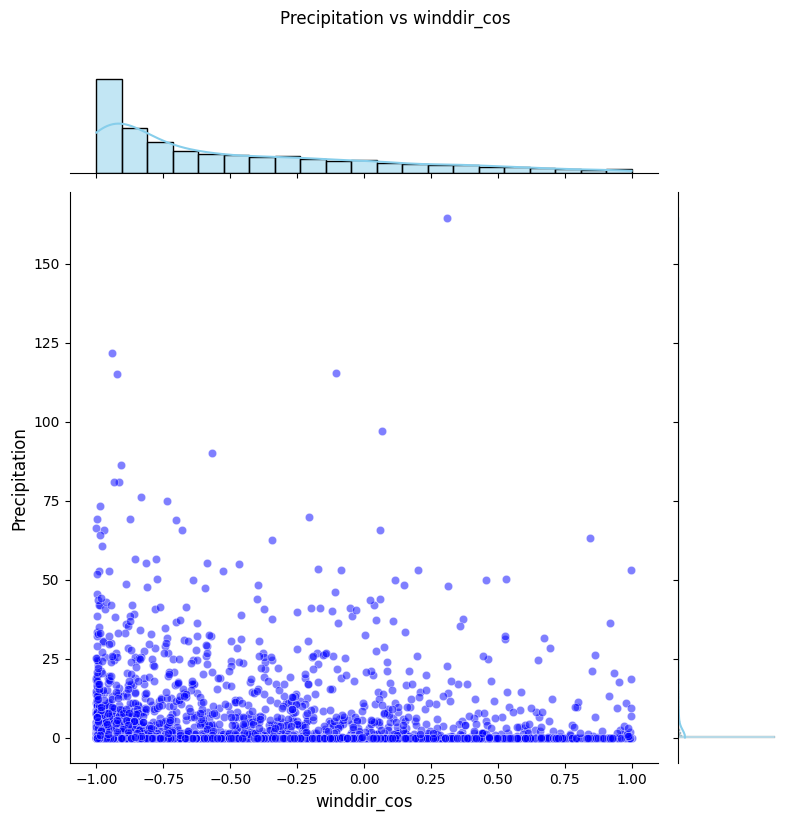

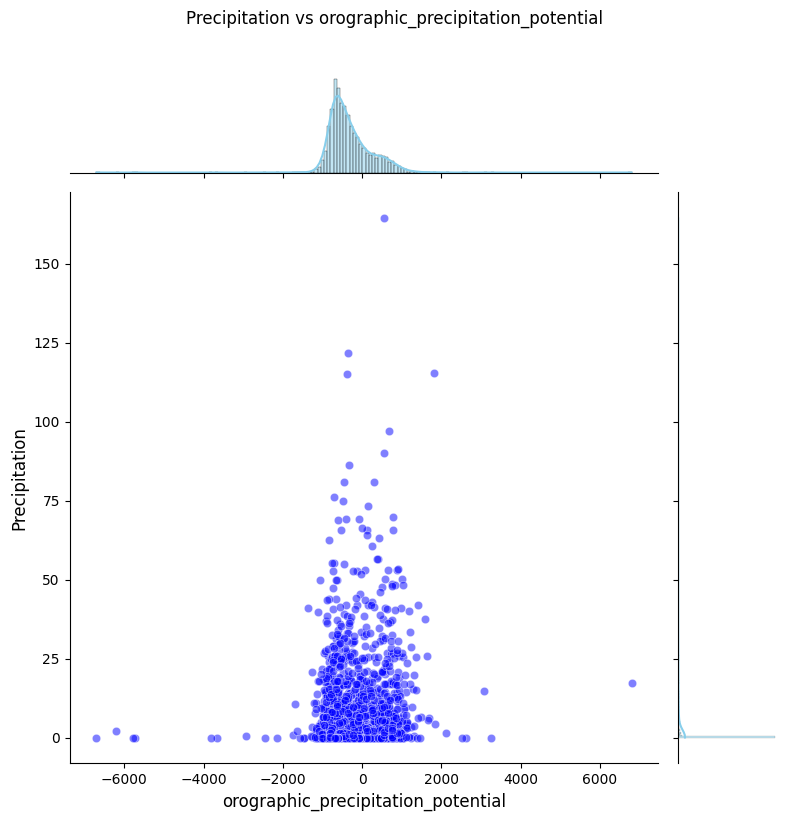

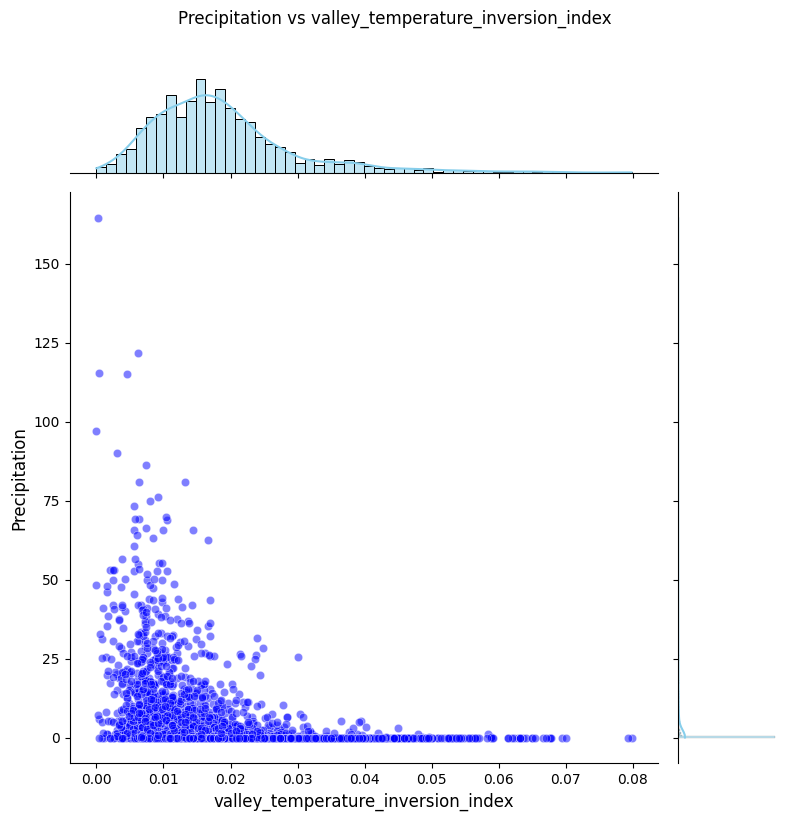

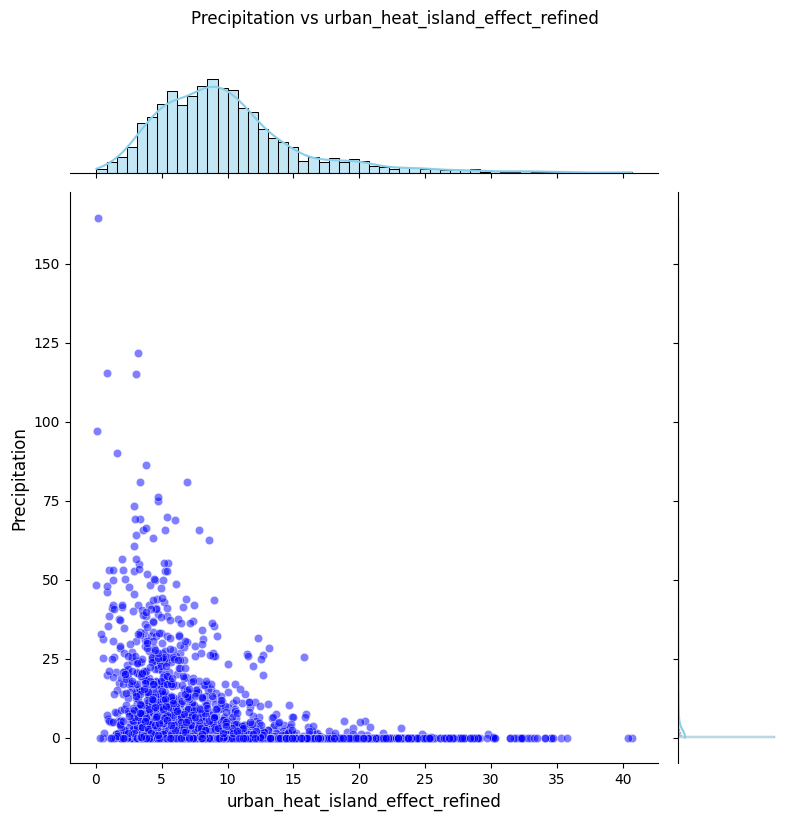

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric features (exclude target if needed)
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'precipitation' in numeric_features:
    numeric_features.remove('precipitation')

# Create joint plots for each numeric feature
for feature in numeric_features:
    g = sns.JointGrid(data=df, x=feature, y='precipitation', height=8)
    g.plot_joint(sns.scatterplot, alpha=0.5, color='blue')  # Scatter plot
    g.plot_marginals(sns.histplot, kde=True, color='skyblue')  # Histograms
    g.set_axis_labels(feature, 'Precipitation', fontsize=12)
    plt.suptitle(f"Precipitation vs {feature}", y=1.02)
    plt.tight_layout()
    plt.show()

In [57]:
# dropping some features based on thier very unusal pattern in the histogram plot
df.drop(columns=['month','season_number'],inplace=True)

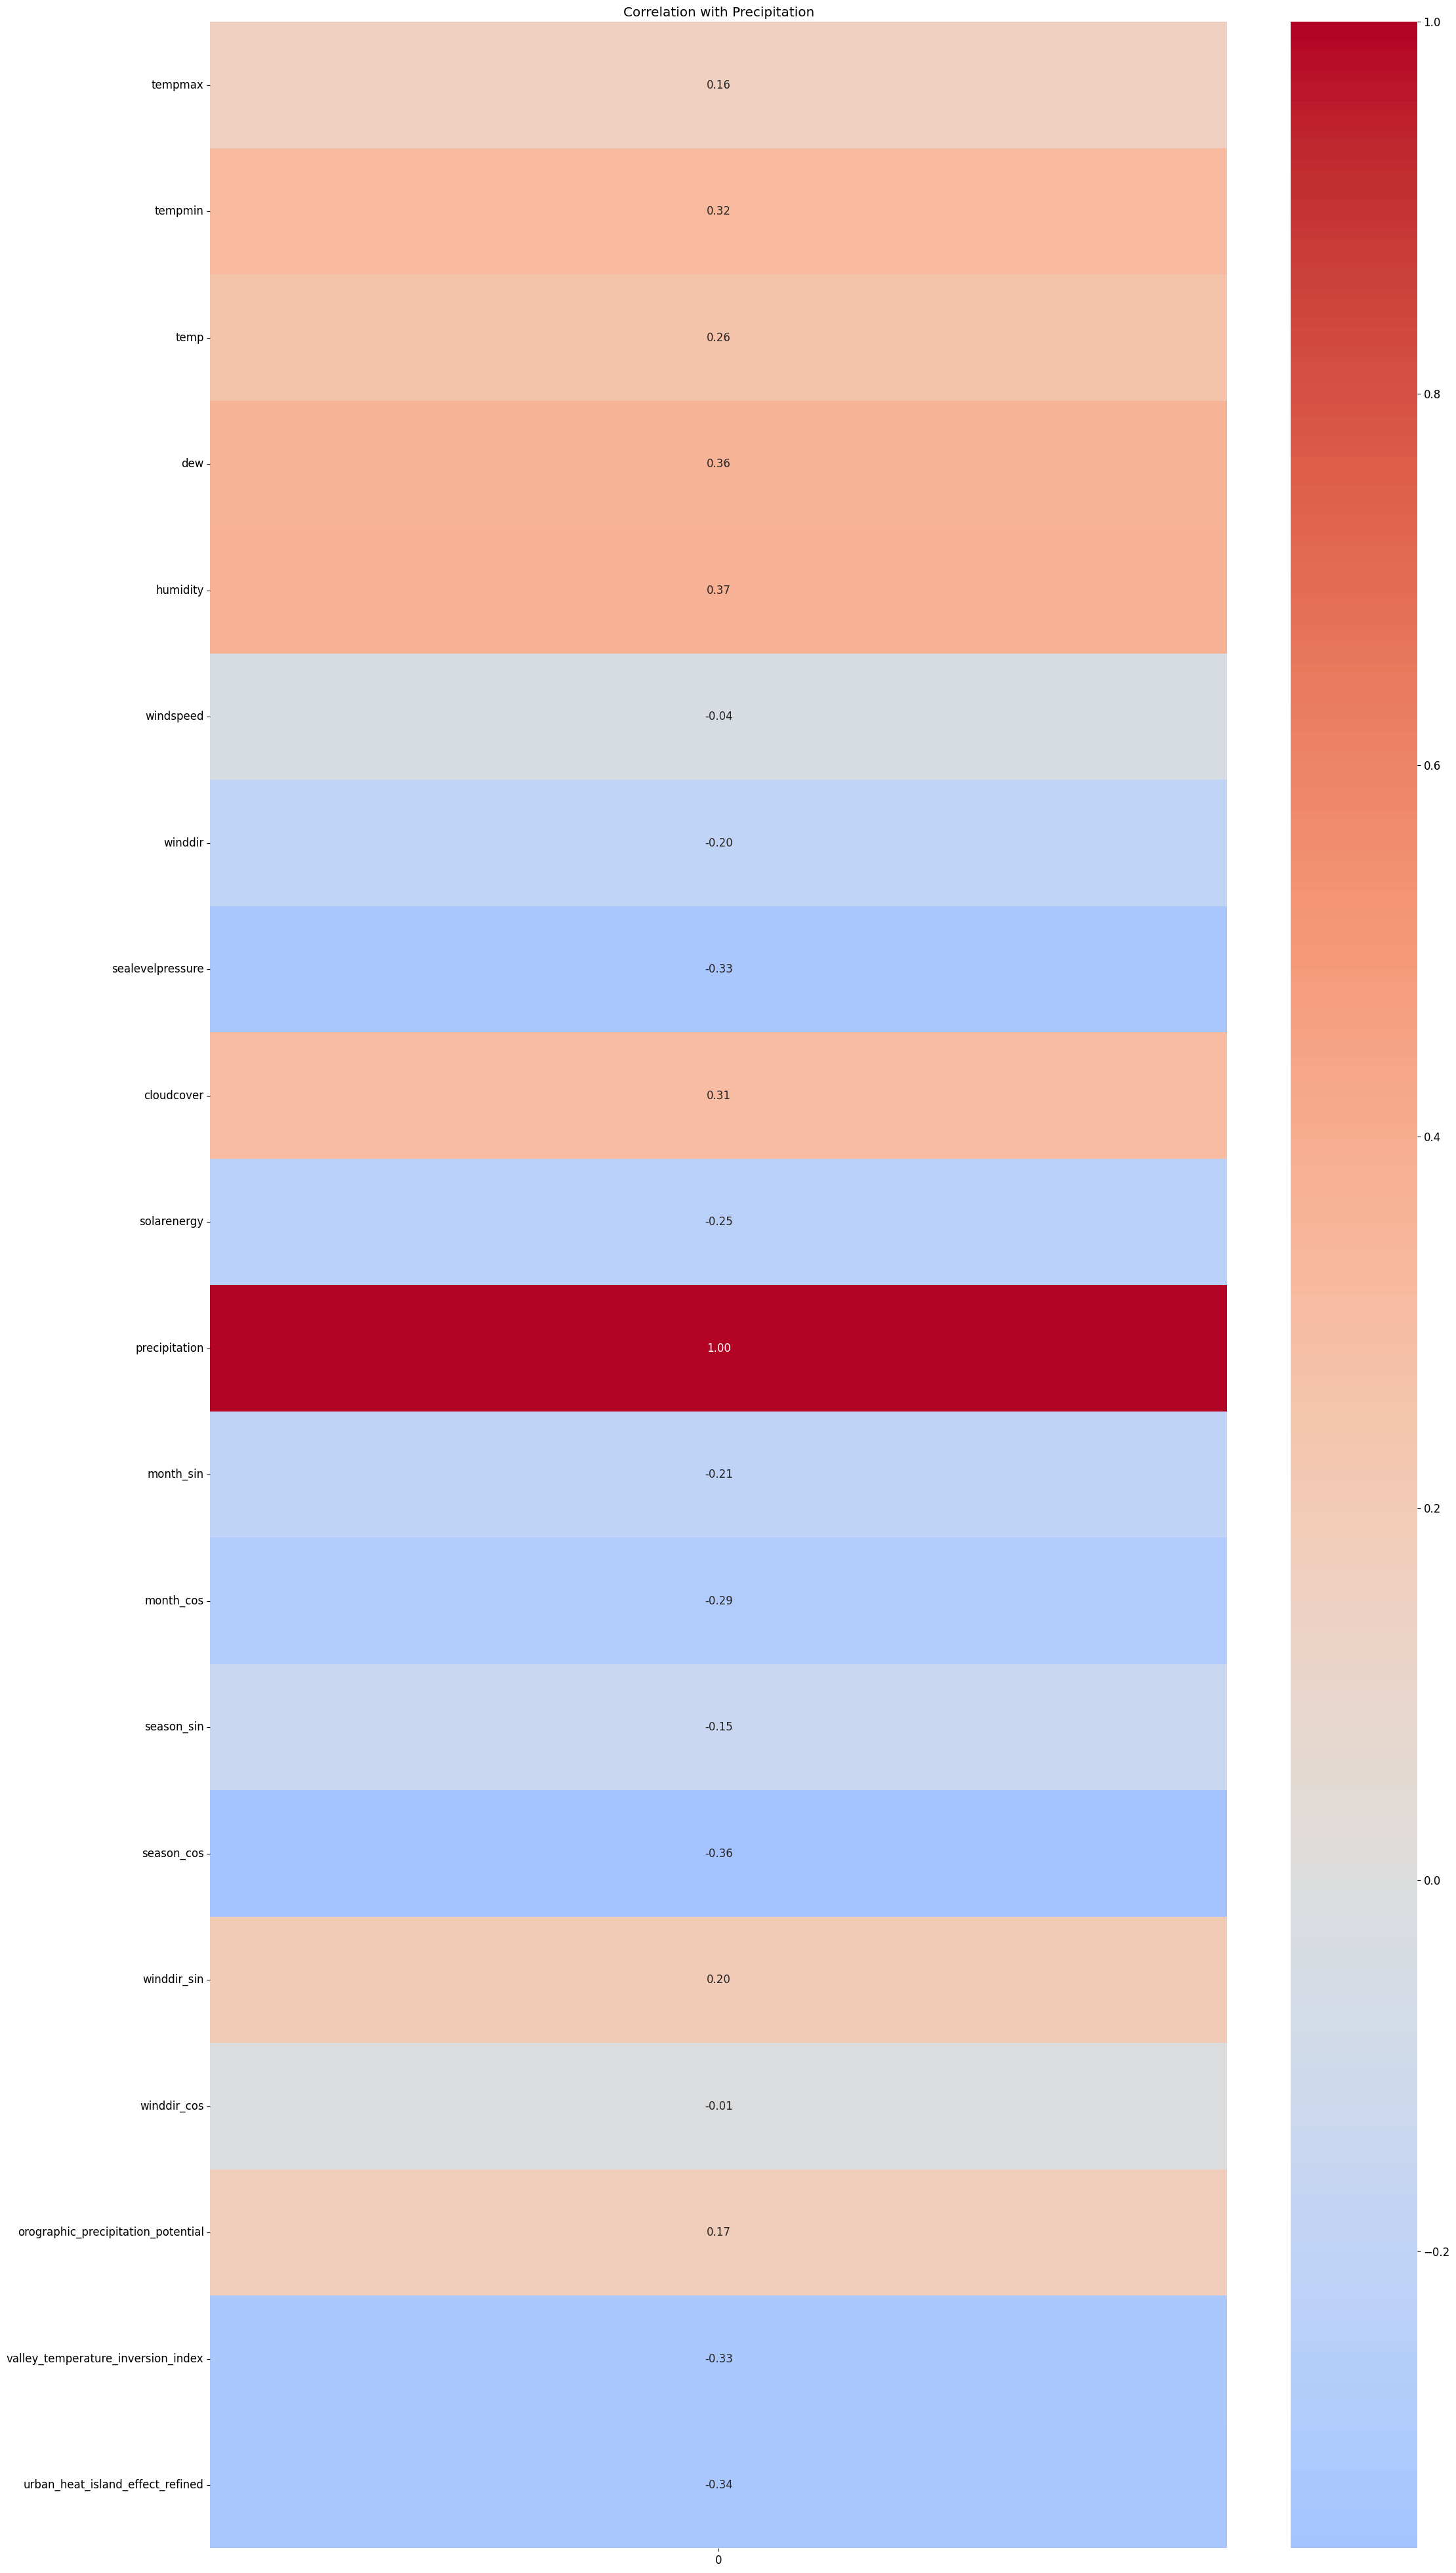

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric features
numeric_df = df.select_dtypes(include=['int64', 'float64'])



# Plot heatmap
plt.rcParams.update({'font.size': 12})



# Compute correlation between 'precipitation' and other columns
precipitation_corr = numeric_df.corrwith(numeric_df["precipitation"])

# Convert to DataFrame for heatmap
precipitation_corr_df = precipitation_corr.to_frame()

# Plot
plt.figure(figsize=(25, 50))
sns.heatmap(precipitation_corr_df, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation with Precipitation")
plt.savefig("/home/momo/Downloads/dataset for prec/cleaned_data/03-interaction_features-visualizations/correlation heatmap/Pearson Correlation Matrix (Numeric Features).png")
plt.show()

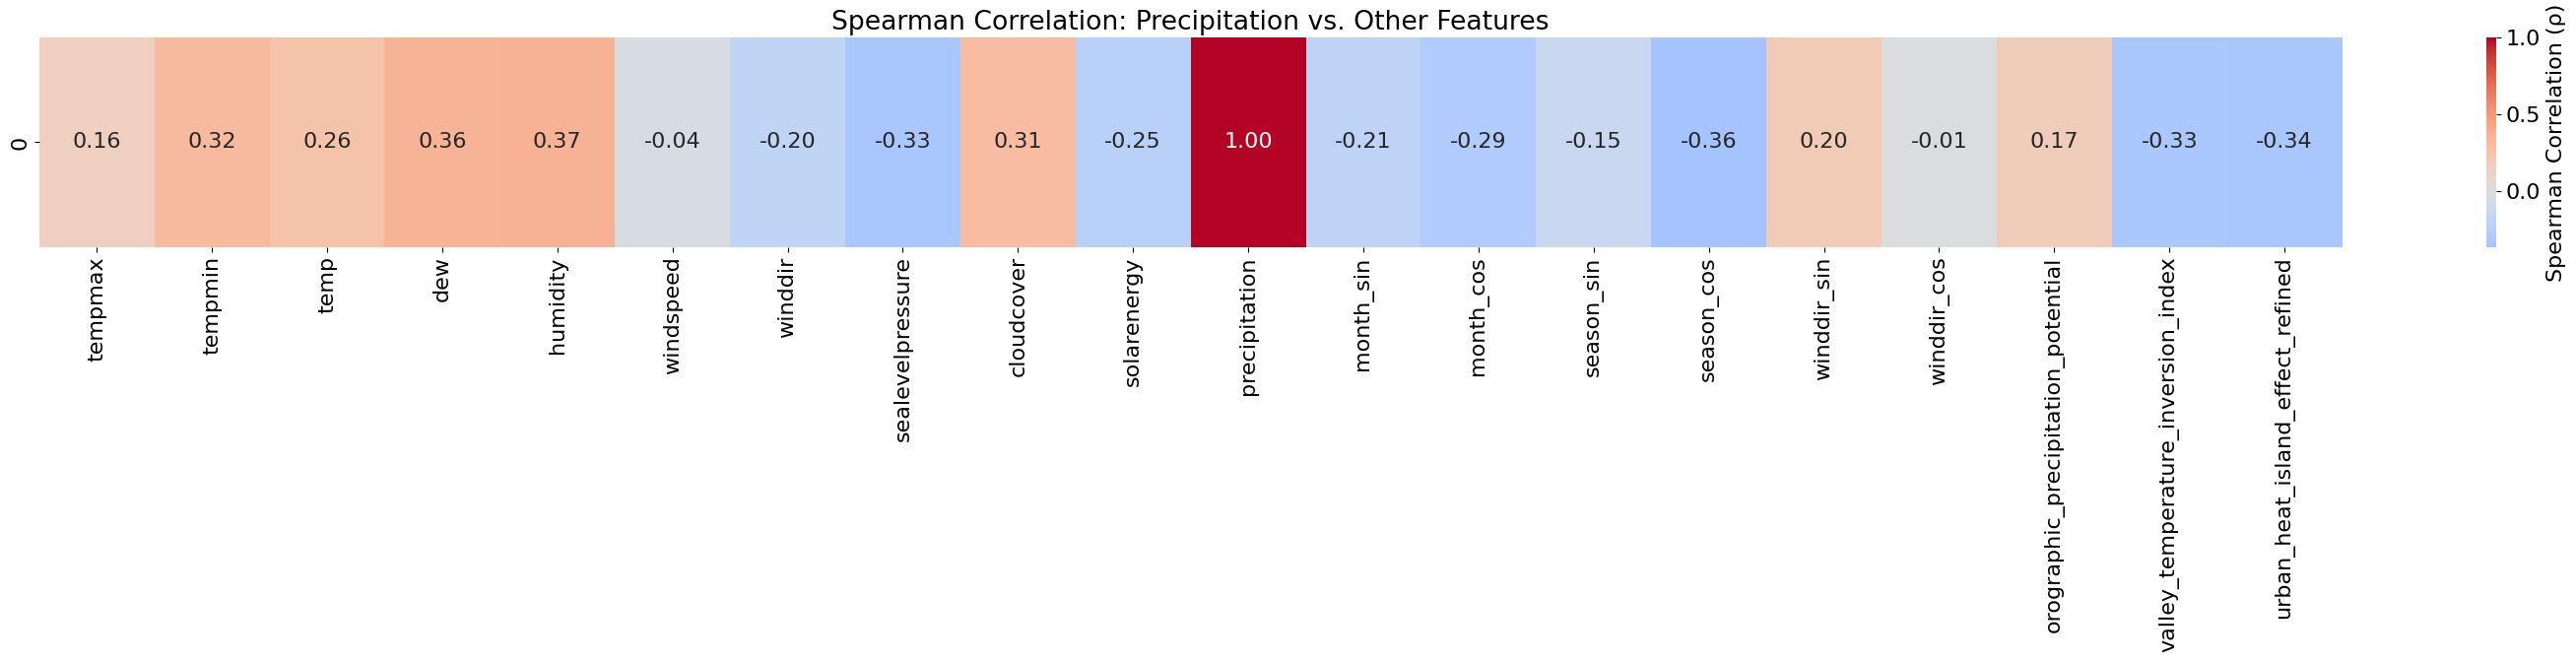

In [59]:
# Reshape correlations for heatmap
precipitation_corr_df = precipitation_corr.to_frame().T  # 1 row × N columns
plt.rcParams.update({'font.size': 16})

# Plot
plt.figure(figsize=(30, 7))  # Wide and short
sns.heatmap(
    precipitation_corr_df, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    center=0,
    cbar_kws={"label": "Spearman Correlation (ρ)"}
)
plt.title("Spearman Correlation: Precipitation vs. Other Features")
plt.tight_layout()
plt.savefig("cleaned_data/03-interaction_features-visualizations/correlation heatmap/correlation heatmapSpearman_Correlation_Heatmap.png")
plt.show()

Correlations for precipitation:
tempmax                               0.162180
tempmin                               0.318262
temp                                  0.259605
dew                                   0.359616
humidity                              0.371200
windspeed                            -0.043090
winddir                              -0.196513
sealevelpressure                     -0.328982
cloudcover                            0.308921
solarenergy                          -0.246560
precipitation                         1.000000
month_sin                            -0.208866
month_cos                            -0.294495
season_sin                           -0.146756
season_cos                           -0.359754
winddir_sin                           0.198125
winddir_cos                          -0.008001
orographic_precipitation_potential    0.173994
valley_temperature_inversion_index   -0.327724
urban_heat_island_effect_refined     -0.335467
Name: precipitation, dtype: 

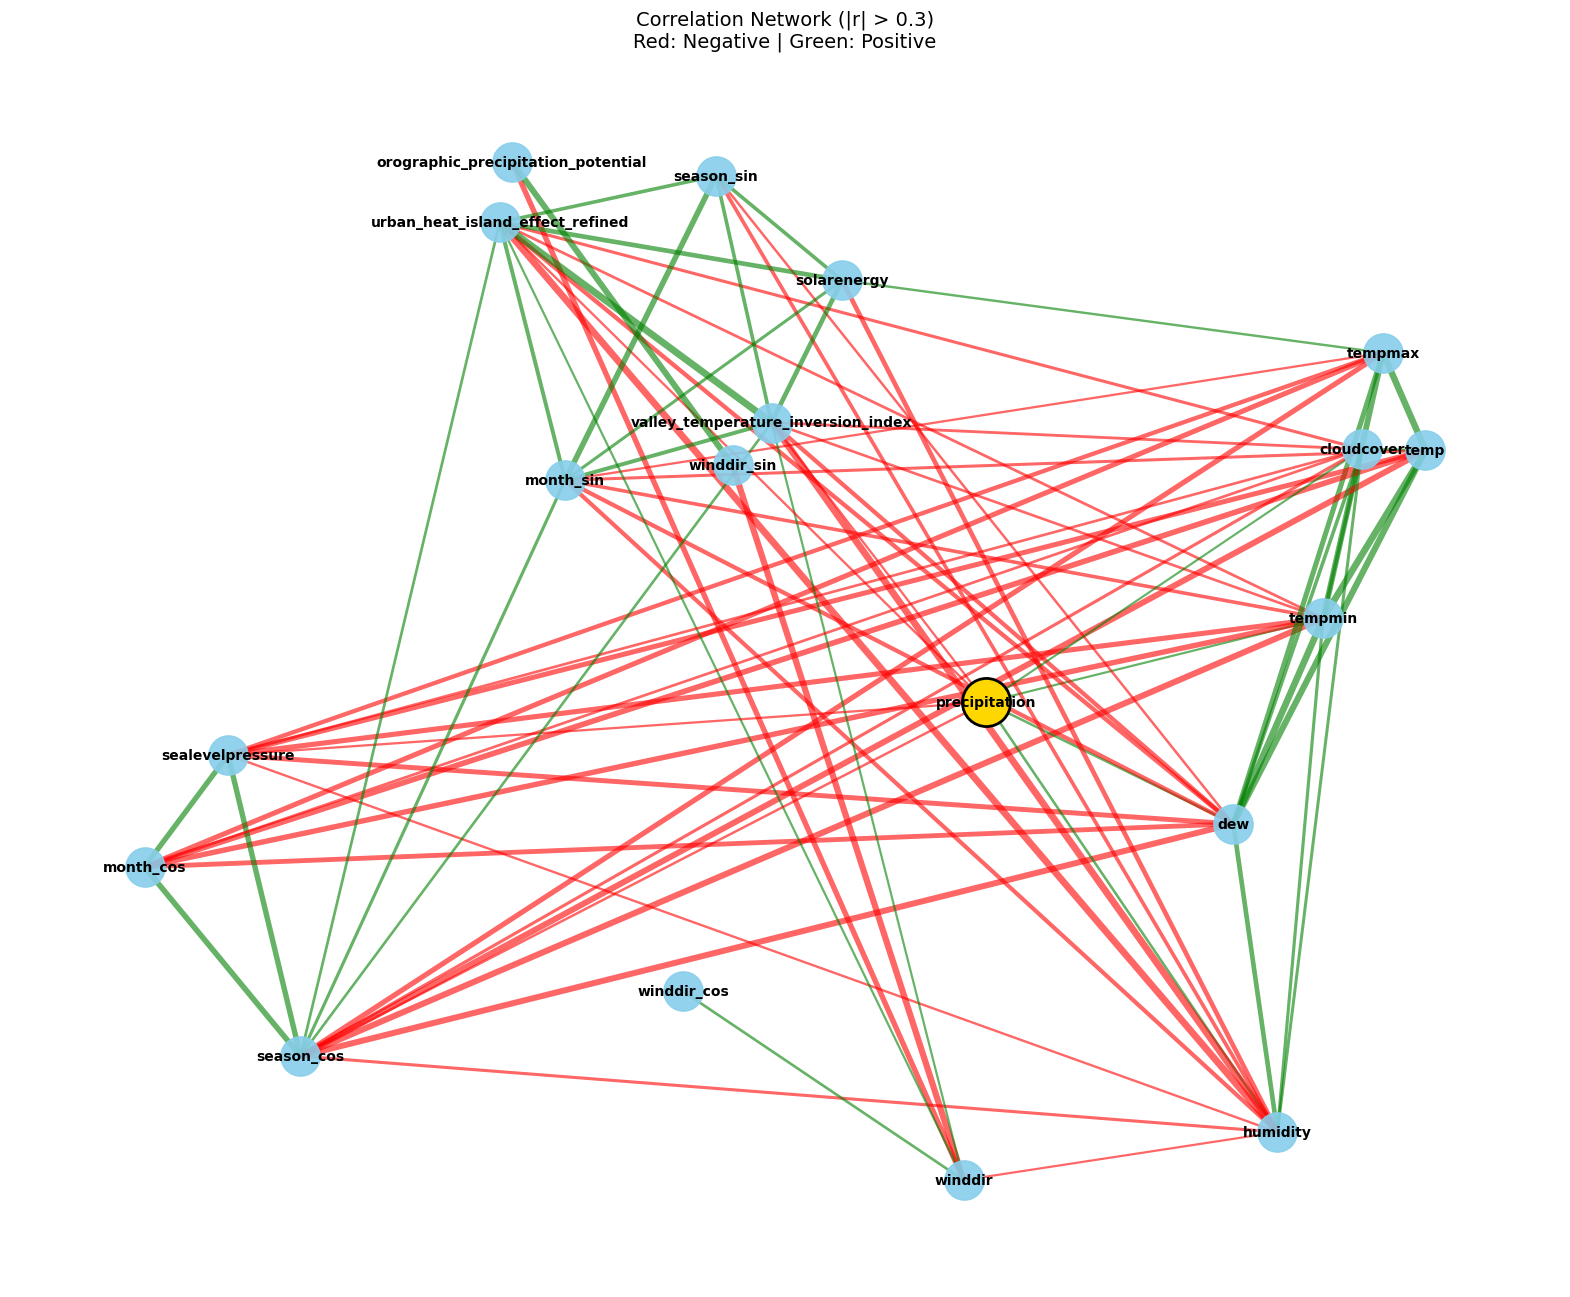

In [60]:
import networkx as nx
import matplotlib.pyplot as plt

# Compute correlation matrix (Pearson/Spearman)
corr_matrix = df.select_dtypes(include=['number']).corr(method='pearson')

# Create graph
G = nx.Graph()
threshold = 0.3 # Adjust based on your needs (strictness)

# Add edges only if correlation exceeds threshold
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            G.add_edge(
                corr_matrix.columns[i], 
                corr_matrix.columns[j], 
                weight=corr_matrix.iloc[i, j],
                color='red' if corr_matrix.iloc[i, j] < 0 else 'green'
            )

# Draw the graph
plt.figure(figsize=(20, 16))
pos = nx.spring_layout(G, k=0.5)  # k=node spacing parameter

# Extract edge colors/weights
edges = G.edges()
colors = [G[u][v]['color'] for u, v in edges]
weights = [abs(G[u][v]['weight']) * 5 for u, v in edges]  # Scale edge width

# Draw nodes/edges
nx.draw_networkx_nodes(
    G, pos, 
    node_size=800,
    node_color='skyblue',
    alpha=0.9
)
nx.draw_networkx_edges(
    G, pos, 
    edge_color=colors,
    width=weights,
    alpha=0.6
)
nx.draw_networkx_labels(
    G, pos, 
    font_size=10,
    font_weight='bold'
)

# Customize plot
plt.title(
    f"Correlation Network (|r| > {threshold})\n"
    "Red: Negative | Green: Positive",
    fontsize=14
)
plt.axis('off')

# Highlight target variable (if applicable)
target_node = 'precipitation'  # Replace with your target column
if target_node in corr_matrix.columns:  # Check in correlation matrix first
    print(f"Correlations for {target_node}:")
    print(corr_matrix[target_node])
    
    if target_node in G.nodes():
        nx.draw_networkx_nodes(
            G, pos, 
            nodelist=[target_node],
            node_size=1200,
            node_color='gold',
            edgecolors='black',
            linewidths=2
        )
    else:
        print(f"Warning: {target_node} has no correlations above the threshold")
else:
    print(f"Error: {target_node} not found in correlation matrix")
plt.savefig("cleaned_data/03-interaction_features-visualizations/correlation heatmap/correlation_network_graph.png")
plt.show()

In [61]:
# Correlation Network Graph
# Element	Meaning
# Node (Circle)	A feature in your dataset (e.g., age, income, price).
# Edge (Line)	A correlation between two features.
# Edge Color	Red = Negative correlation, Green = Positive correlation.
# Edge Thickness	Thicker = Stronger correlation (absolute value).
# Node Size	Larger = More connections (highly correlated with other features).
# Node Position	Closer nodes = Stronger relationships (via force-directed layout).

In [62]:
df.dtypes

datetime                               object
tempmax                               float64
tempmin                               float64
temp                                  float64
dew                                   float64
humidity                              float64
windspeed                             float64
winddir                               float64
sealevelpressure                      float64
cloudcover                            float64
solarenergy                           float64
precipitation                         float64
season                                 object
month_sin                             float64
month_cos                             float64
season_sin                            float64
season_cos                            float64
winddir_sin                           float64
winddir_cos                           float64
orographic_precipitation_potential    float64
valley_temperature_inversion_index    float64
urban_heat_island_effect_refined  

In [63]:
seasons_dict

{'Spring': 1, 'Summer': 2, 'Monsoon': 3, 'Autumn': 4, 'Winter': 5}

In [64]:
# # from above 3 correation graph, dropping some low correlated features threshold = 0.2
# df = df.drop(columns=['wind chill','moisture_convergence','temp_EMA_3_days','humidity_lag_2_days',
#                       'precipitation_lag_2_days','precipitation_lag_1_days','precip_rolling_mean_3_days'
#                       ,'precip_rate_of_change','heat index','wind chill','moisture_flux','moisture_convergence'
#                       ,'cloud_cover_temp_interaction','cloud_cover_humidity_interaction'])

In [66]:
df.dtypes

datetime                               object
tempmax                               float64
tempmin                               float64
temp                                  float64
dew                                   float64
humidity                              float64
windspeed                             float64
winddir                               float64
sealevelpressure                      float64
cloudcover                            float64
solarenergy                           float64
precipitation                         float64
month_sin                             float64
month_cos                             float64
season_sin                            float64
season_cos                            float64
winddir_sin                           float64
winddir_cos                           float64
orographic_precipitation_potential    float64
valley_temperature_inversion_index    float64
urban_heat_island_effect_refined      float64
dtype: object

In [67]:
len(df.dtypes)

21

In [68]:
for i in range(len(df.dtypes)):
    if df.dtypes[i] =='float64':
        df.iloc[:,i] = round(df.iloc[:,i],2)

In [69]:
df

,datetime,tempmax,tempmin,temp,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,...,precipitation,month_sin,month_cos,season_sin,season_cos,winddir_sin,winddir_cos,orographic_precipitation_potential,valley_temperature_inversion_index,urban_heat_island_effect_refined
0,2015-01-01,60.7,39.1,50.0,41.7,74.7,5.8,166.0,1020.4,79.1,...,0.80,0.5,0.87,-0.00,1.00,0.24,-0.97,104.82,0.02,8.53
1,2015-01-02,71.0,49.9,54.9,48.4,80.1,9.2,26.0,1022.2,93.3,...,0.00,0.5,0.87,-0.00,1.00,0.44,0.90,323.04,0.01,6.59
2,2015-01-03,67.7,48.1,54.8,50.5,86.3,15.7,304.8,1021.0,90.3,...,0.50,0.5,0.87,-0.00,1.00,-0.82,0.57,-1112.58,0.01,4.42
3,2015-01-04,69.9,48.1,54.5,49.6,85.5,9.2,252.4,1018.1,67.1,...,0.50,0.5,0.87,-0.00,1.00,-0.95,-0.30,-749.78,0.01,5.25
4,2015-01-05,64.3,42.7,51.3,45.7,83.2,10.3,213.3,1013.9,41.6,...,0.00,0.5,0.87,-0.00,1.00,-0.55,-0.84,-470.49,0.01,6.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3463,2025-06-26,84.1,71.5,76.7,71.6,85.9,11.4,220.1,1011.7,75.9,...,9.90,0.0,-1.00,-0.59,-0.81,-0.64,-0.76,-630.76,0.01,5.35
3464,2025-06-27,82.3,69.7,76.7,71.1,84.0,12.8,237.0,1010.3,80.1,...,18.80,0.0,-1.00,-0.59,-0.81,-0.84,-0.54,-901.74,0.01,5.81
3465,2025-06-28,82.3,71.5,76.1,70.5,84.3,11.4,278.3,1009.3,86.4,...,3.80,0.0,-1.00,-0.59,-0.81,-0.99,0.14,-950.95,0.01,5.75
3466,2025-06-29,82.3,71.5,73.5,71.4,94.2,16.1,223.2,1006.8,88.0,...,19.99,0.0,-1.00,-0.59,-0.81,-0.68,-0.73,-1038.20,0.00,2.23


In [70]:
df.to_csv("/home/momo/Downloads/dataset for prec/cleaned_data/04-before-traansformation.csv",index=False)

In [382]:
len(df[df.precipitation == 0])

2066